# Heroes Of Pymoli Data Analysis
* The majority of age of gamers who paid for the game is in range 15-25 (20-25 yr: 43%, 15-20 yrs: 17%) (See age bar chart)

* The maximum spending for all gamers is less than $20.

*  Oathbreaker, Last Hope of the Breaking Storm	are both the most popular and the most purchased items. Their unit price was higher than the average price.

* Of the 1163 active players, the vast majority are male (84%). There also exists, a smaller, but notable proportion of female players (14%).

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [114]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

* Display the total number of players


In [115]:
print("no. of players:", purchase_data['SN'].nunique())
#purchase_data[(purchase_data['Age']>30) & (purchase_data['Age']<45)].shape

no. of players: 576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [116]:
#Creating summary table
Total=pd.DataFrame({"Number of Unique Items ":purchase_data['Item ID'].nunique(),
                   "Average Price ":purchase_data['Price'].mean(),
                   "Number of Purchases ":purchase_data['Purchase ID'].count(),
                   "Total Revenue":purchase_data['Price'].sum()}, index=[0])
#formatting 
Total["Average Price "]=Total["Average Price "].map("${:.2f}".format)
Total["Total Revenue"]=Total["Total Revenue"].map("${:.2f}".format)
print(Total)


   Number of Unique Items  Average Price   Number of Purchases  Total Revenue
0                      183          $3.05                   780      $2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [117]:
A=purchase_data.drop_duplicates(['SN']).groupby(['Gender'])

B=A['Gender'].count()
GenDemo=pd.DataFrame({"Total Count":A['Gender'].count(),"Percentage of Players": A['Gender'].count()/sum(B)*100})

GenDemo["Percentage of Players"]=GenDemo["Percentage of Players"].map("{:.2f}".format)
print(GenDemo)


                       Total Count Percentage of Players
Gender                                                  
Female                          81                 14.06
Male                           484                 84.03
Other / Non-Disclosed           11                  1.91



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [118]:
GenPur=purchase_data.groupby(['Gender'])
GenPurAnal=pd.DataFrame({'Purchase Count':GenPur['Price'].count(),
                        'Average Purchase Price': GenPur['Price'].sum()/GenPur['Price'].count(),
                        'Total Purchase Value': GenPur['Price'].count(),
                        'Avg Total Purchase per Person':GenPur['Price'].sum()/A['Gender'].count()})
GenPurAnal['Average Purchase Price'] = GenPurAnal['Average Purchase Price'].map("${:,.2f}".format)
GenPurAnal['Total Purchase Value'] = GenPurAnal['Total Purchase Value'].map("${:,.2f}".format)
GenPurAnal['Avg Total Purchase per Person'] = GenPurAnal['Avg Total Purchase per Person'].map("{:,.2f}".format)

GenPurAnal.head()

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,$3.20,$113.00,4.47
Male,652,$3.02,$652.00,4.07
Other / Non-Disclosed,15,$3.35,$15.00,4.56


* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


Text(0, 0.5, 'No. of players')

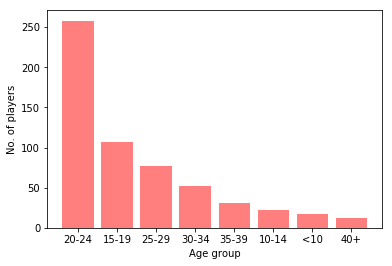

In [119]:
#Age chart to show the range of age of gamers 
import matplotlib.pyplot as plt
groups=list(f"%s-%s" %(x,y) for x in np.arange(5,40,5) for y in [x+4])
bins=np.arange(10,45,5)
bins=np.insert(bins,0,0)
groups[0]='<10'
groups.insert(len(groups),'40+')
bins=np.insert(bins,len(bins),purchase_data['Age'].max()+5)
pr_unq=purchase_data.drop_duplicates(['SN'])
Age_bins=pd.cut(pr_unq["Age"], bins, labels=groups, right=False).value_counts()
ax=plt.bar(Age_bins.index, Age_bins.tolist(), color='r', alpha=0.5, align="center")
plt.xlabel("Age group")
plt.ylabel("No. of players")

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [120]:
AgeGrp=purchase_data.groupby(pd.cut(purchase_data["Age"], bins, labels=groups, right=False))
PurAnalAge = pd.DataFrame({"Purchase Count":AgeGrp["Price"].count(), 
                            "Average Purchase Price":AgeGrp["Price"].mean(),
                            "Total Purchase Value":AgeGrp["Price"].sum(),
                            "Normalized Totals":AgeGrp["Price"].sum()/AgeGrp["SN"].nunique()})
PurAnalAge['Average Purchase Price'] = PurAnalAge['Average Purchase Price'].map("${:,.2f}".format)
PurAnalAge['Total Purchase Value'] = PurAnalAge['Total Purchase Value'].map("${:,.2f}".format)
PurAnalAge['Normalized Totals'] = PurAnalAge['Normalized Totals'].map("{:,.2f}".format)
#PurAnalAge

## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [121]:
TS = purchase_data.groupby(['SN'])
TSG = pd.DataFrame({"Purchase Count":TS["Price"].count(), "Average Purchase Price":TS["Price"].mean(),"Total Purchase Value":TS["Price"].sum()})
TSG = TSG.sort_values("Total Purchase Value", ascending=False)
TSG["Average Purchase Price"] = TSG["Average Purchase Price"].map("${:.2f}".format)
TSG["Total Purchase Value"] = TSG["Total Purchase Value"].map("${:,.2f}".format)
TSG.head()

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [122]:
PI = purchase_data.groupby(['Item ID','Item Name'])
MPI_base = pd.DataFrame({"Purchase Count":PI["Price"].count(), "Item Price":PI["Price"].mean(),"Total Purchase Value":PI["Price"].sum()})
MPI = MPI_base.sort_values("Purchase Count", ascending=False)
MPI["Item Price"] = MPI["Item Price"].map("${:.2f}".format)
MPI["Total Purchase Value"] = MPI["Total Purchase Value"].map("${:,.2f}".format)

MPI.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [123]:
MPI = MPI_base.sort_values("Total Purchase Value", ascending=False)
MPI.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80
